In [8]:

# import the tools needed to analyse and plot the data. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

print('done')

done


In [9]:
# This updates the plotting styles within the program to follow the seaborn style. Not needed,just the seaborn style looks better.
sns.set()

In [10]:
from sklearn import datasets

In [15]:
data = datasets.load_iris()

print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [38]:
df["target"] = data["target"]

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Below is a basic description of the data. It shows some basic statistics of the 4 features.
Although it is a basic description it still gives some interesting information. For example that there is a big difference between the smallest petal length and the largest. There isn't as large a range in petal width.

In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This following histogram shows the distribution of sepal length.

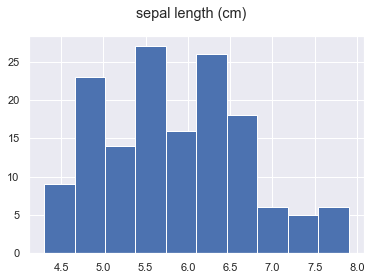

In [34]:
# first I set a variable named col and equal it to the column I want to use for the histogram. Then  I pass it into the histogram and finaly use it to make a title for the histogram. The final part I am saving the histogram as an image so it saves elsewhere in my directory.
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('sepallengthhist.png')
plt.show()

A basic histogram for Sepal Width

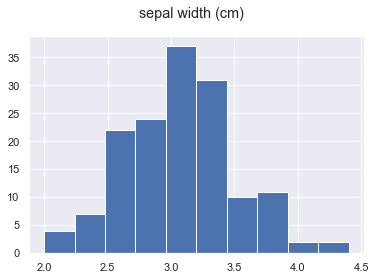

In [33]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('sepalwidththhist.png')
plt.show()

Histogram for Petal Length

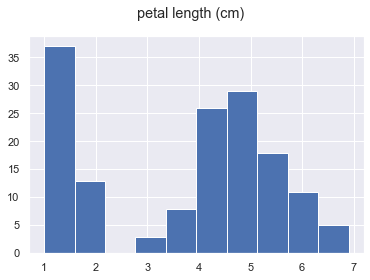

In [35]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('petallengthhist.png')
plt.show()

Histogram for Petal Width

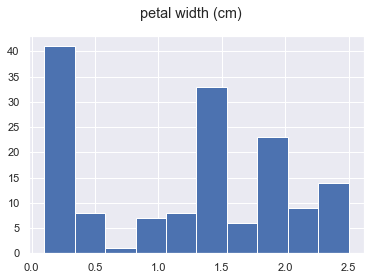

In [36]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.savefig('petalwidthhist.png')
plt.show()

Next I'm making a plot but I want the plot to say the flower that belongs to the particular number.
The target names first gives the name of each flower type in the dataset.
Then using ".map" I am assigning each number according to the target number.

In [40]:

data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
# gives the targets names for the plot. 0 = setosa, 1 = versicolor and 2 = virginica
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# checking if above code works by printing the whole dataset
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Showing the relationship of sepal length with the target. 

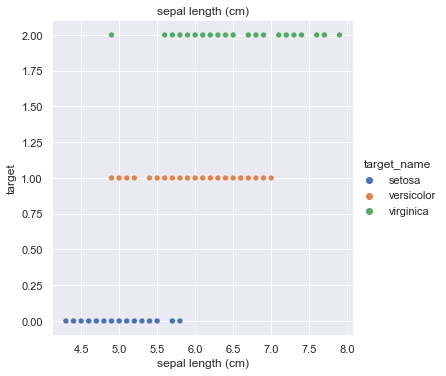

In [55]:
col = "sepal length (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('sepallengthplt.png')
plt.show()

Showing the relationship of sepal width with the target. 

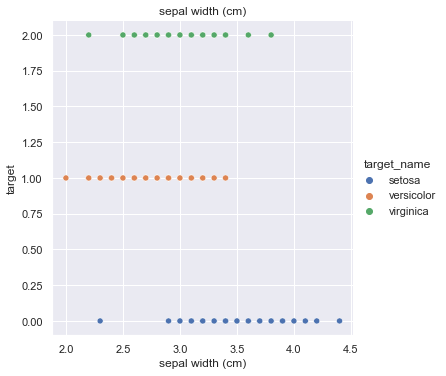

In [56]:
col = "sepal width (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('sepalwidthplt.png')
plt.show()

Showing the relationship of petal length with the target. 

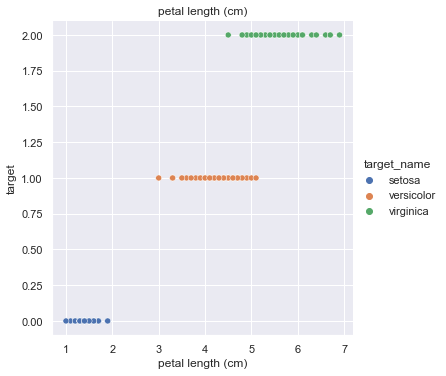

In [58]:
col = "petal length (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('petallengthplt.png')
plt.show()

Showing the relationship of petal width with the target. 

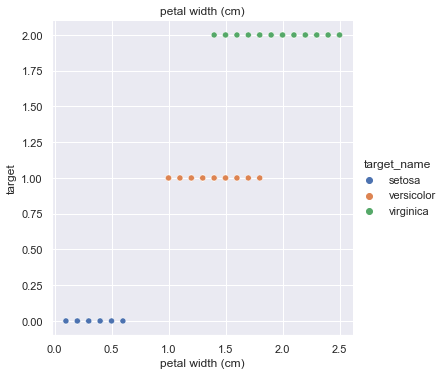

In [59]:
col = "petal width (cm)"
sns.relplot(x=col, y ="target", hue="target_name", data=df)
plt.title(col)
plt.savefig('petalwidthplt.png')
plt.show()